In [4]:
%matplotlib inline

import numpy as np
import cv2 as cv
import os.path
from matplotlib import pyplot as plt

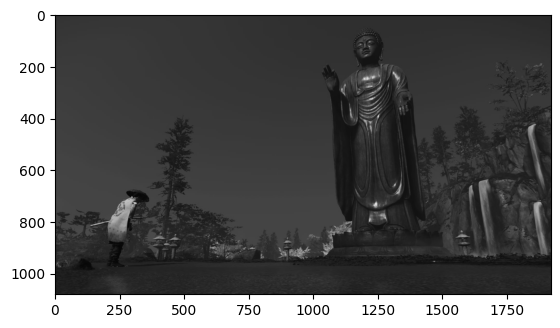

In [5]:
frame = cv.imread("./Ghost of Tsushima_20221218171641.jpg")

numpy_file = np.load('./models/pts_in_hull.npy')

Caffe_net = cv.dnn.readNetFromCaffe("./models/colorization_deploy_v2.prototxt", "./models/colorization_release_v2.caffemodel")

numpy_file = numpy_file.transpose().reshape(2, 313, 1, 1)
Caffe_net.getLayer(Caffe_net.getLayerId('class8_ab')).blobs = [numpy_file.astype(np.float32)]
Caffe_net.getLayer(Caffe_net.getLayerId('conv8_313_rh')).blobs = [np.full([1, 313], 2.606, np.float32)]

plt.imshow(frame)
plt.show()

In [6]:
input_width = 224
input_height = 224

rgb_img = (frame[:,:,[2, 1, 0]] * 1.0 / 255).astype(np.float32)
lab_img = cv.cvtColor(rgb_img, cv.COLOR_RGB2Lab)
l_channel = lab_img[:,:,0] 

In [7]:
l_channel_resize = cv.resize(l_channel, (input_width, input_height)) 
l_channel_resize -= 50

Caffe_net.setInput(cv.dnn.blobFromImage(l_channel_resize))
ab_channel = Caffe_net.forward()[0,:,:,:].transpose((1,2,0)) 

In [8]:
(original_height,original_width) = rgb_img.shape[:2] 
ab_channel_us = cv.resize(ab_channel, (original_width, original_height))
lab_output = np.concatenate((l_channel[:,:,np.newaxis],ab_channel_us),axis=2) 
bgr_output = np.clip(cv.cvtColor(lab_output, cv.COLOR_Lab2BGR), 0, 1)

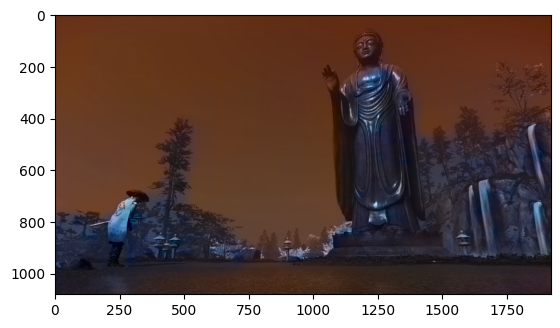

In [9]:
cv.imwrite("./result.png", (bgr_output*255).astype(np.uint8))
frame = cv.imread("./result.png")
plt.imshow(frame)
plt.show()